# STOCK PRICE PREDICTION USING LSTM

## AUTOMATED EDA

In [51]:
!pip install pandas_profiling --upgrade

     |████████████████████████████████| 256kB 6.8MB/s 
     |████████████████████████████████| 112kB 11.8MB/s 
     |████████████████████████████████| 1.1MB 11.9MB/s 
     |████████████████████████████████| 10.1MB 26.1MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 81kB 11.6MB/s 
     |████████████████████████████████| 3.1MB 48.9MB/s 
     |████████████████████████████████| 645kB 39.7MB/s 
     |████████████████████████████████| 296kB 44.7MB/s 
  Created wheel for phik: filename=phik-0.11.2-cp37-none-any.whl size=1107437 sha256=c43608b30e9abbd322b857eb9af04d339fde5cda960b9fcef6f58fa581f859f1
  Stored in directory: /root/.cache/pip/wheels/c0/a3/b0/f27b1cfe32ea131a3715169132ff6d85653789e80e966c3bf6
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp37-none-any.whl size=27099 sha256=b260a2dcc8314047cce3dab50ab4932dcd3e7259e549adc497448b427ba69cbe
  Stored in directory: /root/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075

In [55]:
import pandas as pd 
import pandas_profiling as pf 
df = pd.read_csv('/content/NSE-Tata-Global-Beverages-Limited.csv')

In [2]:
pf.ProfileReport(df)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## MANUAL EDA

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  1235 non-null   object 
 1   Open                  1235 non-null   float64
 2   High                  1235 non-null   float64
 3   Low                   1235 non-null   float64
 4   Last                  1235 non-null   float64
 5   Close                 1235 non-null   float64
 6   Total Trade Quantity  1235 non-null   float64
 7   Turnover (Lacs)       1235 non-null   float64
dtypes: float64(7), object(1)
memory usage: 77.3+ KB


Text(0.5, 1.0, 'Close Price History')

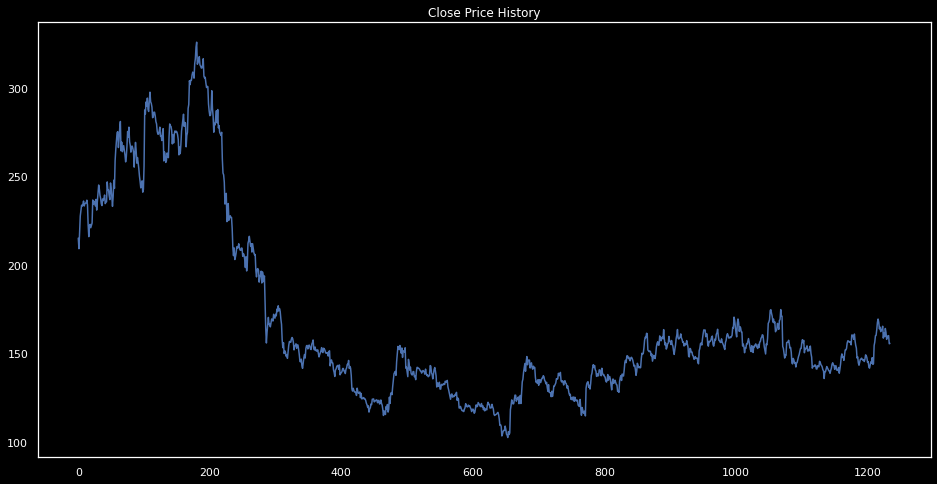

In [15]:
# Analyzing the close price
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})

# {'axes.axisbelow': True,
#  'axes.edgecolor': 'white',
#  'axes.facecolor': '#EAEAF2',
#  'axes.grid': True,
#  'axes.labelcolor': '.15',
#  'axes.linewidth': 0,
#  'font.family': 'Arial',
#  'grid.color': 'white',
#  'grid.linestyle': '-',
#  'image.cmap': 'Greys',
#  'legend.frameon': False,
#  'legend.numpoints': 1,
#  'legend.scatterpoints': 1,
#  'lines.solid_capstyle': 'round',
#  'pdf.fonttype': 42,
#  'text.color': '.15',
#  'xtick.color': '.15',
#  'xtick.direction': 'out',
#  'xtick.major.size': 0,
#  'xtick.minor.size': 0,
#  'ytick.color': '.15',
#  'ytick.direction': 'out',
#  'ytick.major.size': 0,
#  'ytick.minor.size': 0}

plt.figure(figsize=(16,8))
plt.plot(df['Close']) 
plt.title('Close Price History')

In [16]:
df.head()

Date    Open    High  ...   Close  Total Trade Quantity  Turnover (Lacs)
0  2018-10-08  208.00  222.25  ...  215.15             4642146.0         10062.83
1  2018-10-05  217.00  218.60  ...  209.20             3519515.0          7407.06
2  2018-10-04  223.50  227.80  ...  218.20             1728786.0          3815.79
3  2018-10-03  230.00  237.50  ...  227.60             1708590.0          3960.27
4  2018-10-01  234.55  234.60  ...  230.90             1534749.0          3486.05

[5 rows x 8 columns]

In [56]:
df["Date"] = pd.to_datetime(df.Date,format="%Y-%m-%d")
df.index = df['Date']

In [57]:
data = df.sort_index(ascending=True,axis=0)
new_data = pd.DataFrame(index=range(0,len(df)), columns=['Date','Close'])
new_data.head()

Date Close
0  NaN   NaN
1  NaN   NaN
2  NaN   NaN
3  NaN   NaN
4  NaN   NaN

In [58]:
for i in range(0, len(data)):
    new_data["Date"][i] = data['Date'][i]
    new_data["Close"][i] = data["Close"][i]
new_data.head()

Date   Close
0  2013-10-08 00:00:00   155.8
1  2013-10-09 00:00:00  155.55
2  2013-10-10 00:00:00  160.15
3  2013-10-11 00:00:00  160.05
4  2013-10-14 00:00:00  159.45

In [59]:
new_data.index = new_data.Date
new_data.drop("Date", axis=1, inplace=True)
new_data.head()

Close
Date              
2013-10-08   155.8
2013-10-09  155.55
2013-10-10  160.15
2013-10-11  160.05
2013-10-14  159.45

## Feature Engineering

In [60]:
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]
train[0:5]

array([[155.8],
       [155.55],
       [160.15],
       [160.05],
       [159.45]], dtype=object)

In [61]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [62]:
x_train, y_train = [], []

for i in range(60, len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
    
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [64]:
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test=[]

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

## LSTM

In [65]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

lstm_model = Sequential()

lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50, return_sequences=True))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(units=50))

lstm_model.add(Dense(1))

lstm_model.compile(loss='mean_squared_error', optimizer='adam')

lstm_model.fit(x_train, y_train, epochs=100, batch_size=32, verbose=2)

Epoch 1/100
29/29 - 7s - loss: 0.0067
Epoch 2/100
29/29 - 2s - loss: 0.0016
Epoch 3/100
29/29 - 2s - loss: 0.0013
Epoch 4/100
29/29 - 2s - loss: 0.0012
Epoch 5/100
29/29 - 2s - loss: 0.0011
Epoch 6/100
29/29 - 2s - loss: 0.0011
Epoch 7/100
29/29 - 2s - loss: 9.4159e-04
Epoch 8/100
29/29 - 2s - loss: 0.0011
Epoch 9/100
29/29 - 2s - loss: 8.9364e-04
Epoch 10/100
29/29 - 2s - loss: 9.0095e-04
Epoch 11/100
29/29 - 2s - loss: 8.1178e-04
Epoch 12/100
29/29 - 2s - loss: 7.8533e-04
Epoch 13/100
29/29 - 2s - loss: 7.5614e-04
Epoch 14/100
29/29 - 2s - loss: 7.0725e-04
Epoch 15/100
29/29 - 2s - loss: 6.6048e-04
Epoch 16/100
29/29 - 2s - loss: 6.4226e-04
Epoch 17/100
29/29 - 2s - loss: 6.1268e-04
Epoch 18/100
29/29 - 2s - loss: 6.0319e-04
Epoch 19/100
29/29 - 2s - loss: 5.7826e-04
Epoch 20/100
29/29 - 2s - loss: 5.9659e-04
Epoch 21/100
29/29 - 2s - loss: 5.6797e-04
Epoch 22/100
29/29 - 2s - loss: 5.8486e-04
Epoch 23/100
29/29 - 2s - loss: 5.0816e-04
Epoch 24/100
29/29 - 2s - loss: 5.1146e-04
Epoch

In [66]:
# predicting
predicted_closing_price = lstm_model.predict(x_test)

predicted_closing_price = sc.inverse_transform(predicted_closing_price)

In [67]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = predicted_closing_price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


Text(0.5, 1.0, 'Results')

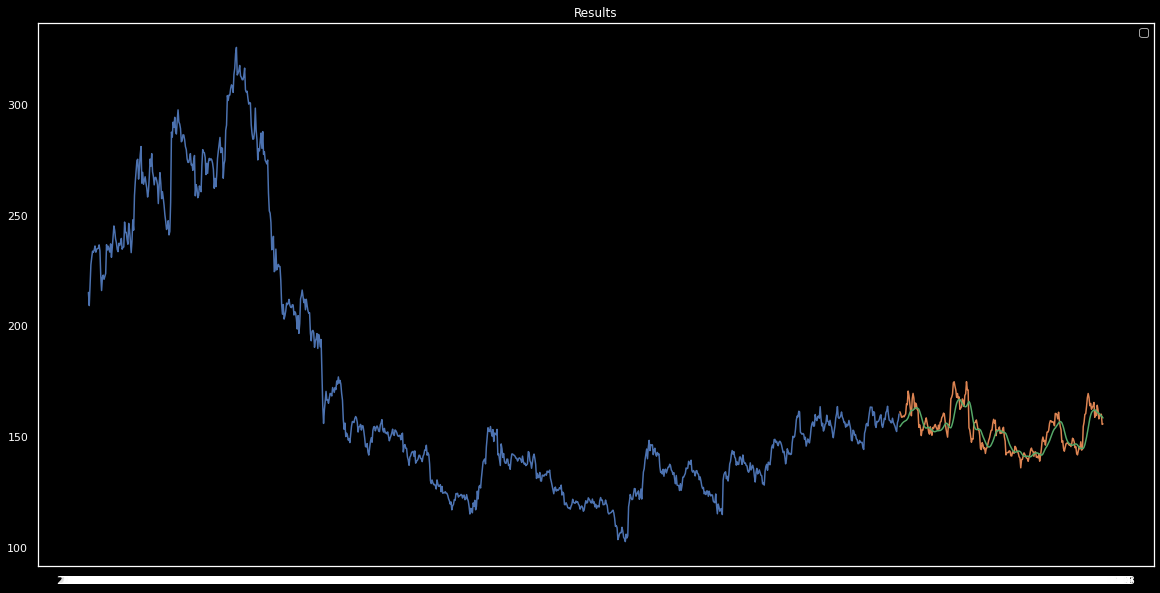

In [69]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 
            'axes.grid' : False, 
            'text.color': 'white',
            'xtick.color': 'white',
            'ytick.color': 'white'})
plt.plot(train_data["Close"])
plt.plot(valid_data[['Close',"Predictions"]])
# plt.legend()
plt.title("Results")